In [1]:

import numpy as np
import pandas as pd

In [5]:
#file download link:- "http://archive.ics.uci.edu/dataset/228/sms+spam+collection" 
#delete this like after letter
df = pd.read_csv(r"C:\Users\ninjaPC\Downloads\sms+spam+collection\ninja spam",sep='\t',names=['label','text'])


In [6]:
df


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.shape


(5572, 2)

In [8]:
import nltk


In [9]:
n
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riteshPatil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:

sent = 'Hare Krishna!'

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riteshPatil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:

from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
swords = stopwords.words('english')
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hare', 'Krishna', '!']

In [28]:

def clean_text(sent):
 tokens = word_tokenize(sent)
 clean = [word for word in tokens if word.isdigit() or word.isalpha()]
 clean = [ps.stem(word) for word in clean
 if word not in swords]
 return clean

In [29]:

clean_text(sent)



['hare', 'krishna']

In [30]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
x = df['text']
y = df['label']


In [31]:

x_new = tfidf.fit_transform(x)

In [32]:
x.shape

(5572,)

In [33]:
x_new.shape

(5572, 6513)

In [34]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

<Axes: xlabel='label', ylabel='count'>

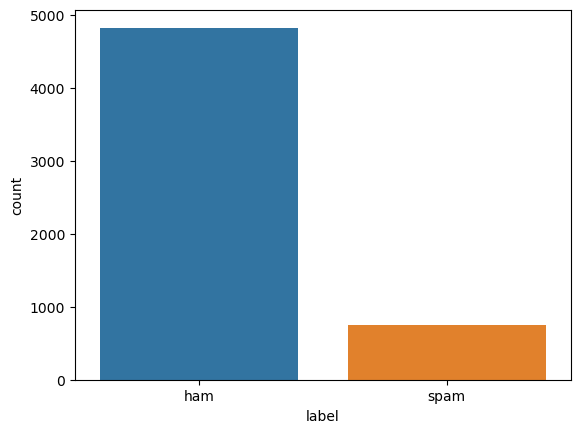

In [35]:

import seaborn as sns
sns.countplot(x=y)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,
 random_state=1)

In [37]:

print(f"Size of splitted data")
print(f"x train {x_train.shape}")
print(f"y train {y_train.shape}")
print(f"y test {x_test.shape}")
print(f"y test {y_test.shape}")


Size of splitted data
x train (4179, 6513)
y train (4179,)
y test (1393, 6513)
y test (1393,)


In [38]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)
y_pred_nb = nb.predict(x_test.toarray())

In [39]:
y_test.value_counts()

label
ham     1208
spam     185
Name: count, dtype: int64

In [40]:

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


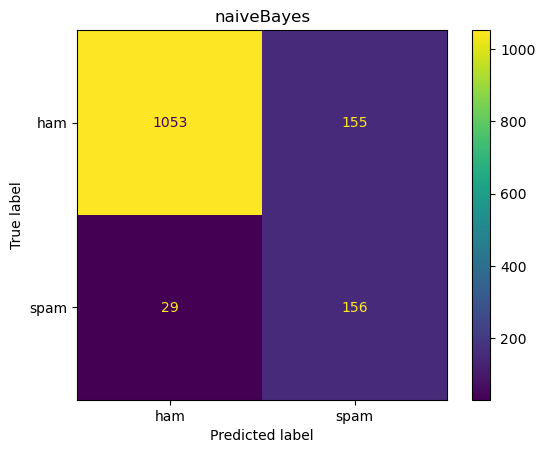

 Accuracy is 0.867910983488873
              precision    recall  f1-score   support

         ham       0.97      0.87      0.92      1208
        spam       0.50      0.84      0.63       185

    accuracy                           0.87      1393
   macro avg       0.74      0.86      0.77      1393
weighted avg       0.91      0.87      0.88      1393



In [41]:

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title('naiveBayes')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_nb)}")
print(classification_report(y_test,y_pred_nb))


In [42]:

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [43]:
y_pred_rf = model_rf.predict(x_test)

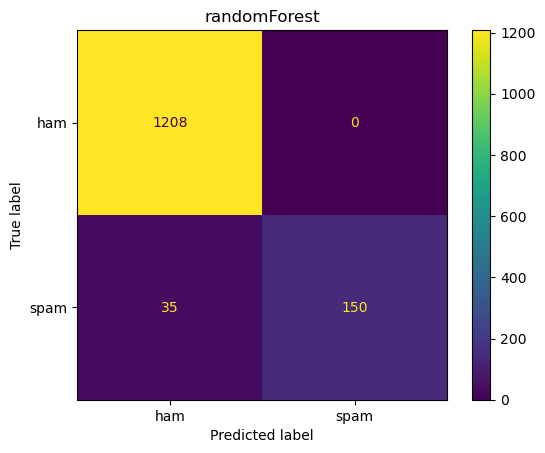

 Accuracy is 0.9748743718592965
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.81      0.90       185

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('randomForest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))


In [45]:

from sklearn.model_selection import GridSearchCV


In [46]:

para = {
 
 'criterion':['gini', 'entropy','log_loss'],
 # 'max_features': ['sqrt','log2'],
 #'random_state': [0,1,2,3,4],
 'class_weight':['balanced','balanced_subsample']
}

In [47]:

grid = GridSearchCV(model_rf, param_grid=para, cv=5, scoring='accuracy')

In [48]:

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [49]:
rf = grid.best_estimator_


In [50]:
y_pred_grid = rf.predict(x_test)


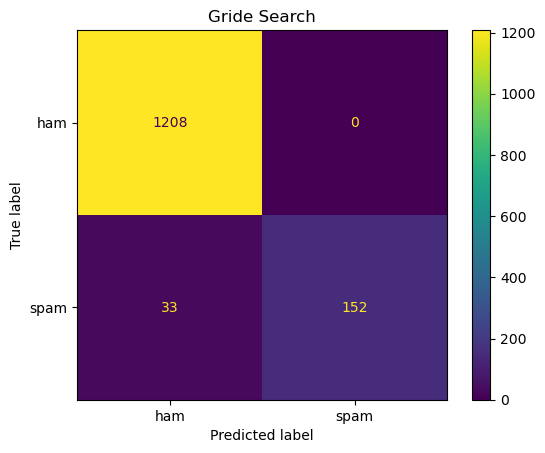

 Accuracy is 0.9763101220387652
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.82      0.90       185

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [51]:

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid)
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_grid)}")
print(classification_report(y_test,y_pred_grid))